[nltk_data] Downloading package punkt to
[nltk_data]     C:\Users\Hemanth\AppData\Roaming\nltk_data...
[nltk_data]   Package punkt is already up-to-date!
[nltk_data] Downloading package stopwords to
[nltk_data]     C:\Users\Hemanth\AppData\Roaming\nltk_data...
[nltk_data]   Package stopwords is already up-to-date!
[nltk_data] Downloading package wordnet to
[nltk_data]     C:\Users\Hemanth\AppData\Roaming\nltk_data...
[nltk_data]   Package wordnet is already up-to-date!
C:\Users\Hemanth\AppData\Local\Programs\Python\Python310\lib\site-packages\sklearn\metrics\_classification.py:1469: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
C:\Users\Hemanth\AppData\Local\Programs\Python\Python310\lib\site-packages\sklearn\metrics\_classification.py:1469: UndefinedMetricWarning: Precision and F-score are ill-defined a

Classification Report:
               precision    recall  f1-score   support

           0       0.79      0.84      0.81        57
           1       1.00      0.06      0.12        16
           2       0.00      0.00      0.00         4
           3       0.94      0.74      0.83        23
           4       0.91      0.77      0.83        39
           5       0.73      0.94      0.82        70
           6       0.59      0.80      0.68        41
           7       1.00      0.58      0.74        24

    accuracy                           0.76       274
   macro avg       0.74      0.59      0.60       274
weighted avg       0.79      0.76      0.74       274

Confusion Matrix:
 [[48  0  0  1  2  2  4  0]
 [ 3  1  0  0  0  3  9  0]
 [ 1  0  0  0  0  3  0  0]
 [ 2  0  0 17  0  4  0  0]
 [ 4  0  0  0 30  4  1  0]
 [ 0  0  0  0  0 66  4  0]
 [ 2  0  0  0  1  5 33  0]
 [ 1  0  0  0  0  4  5 14]]
Accuracy Score: 0.7627737226277372


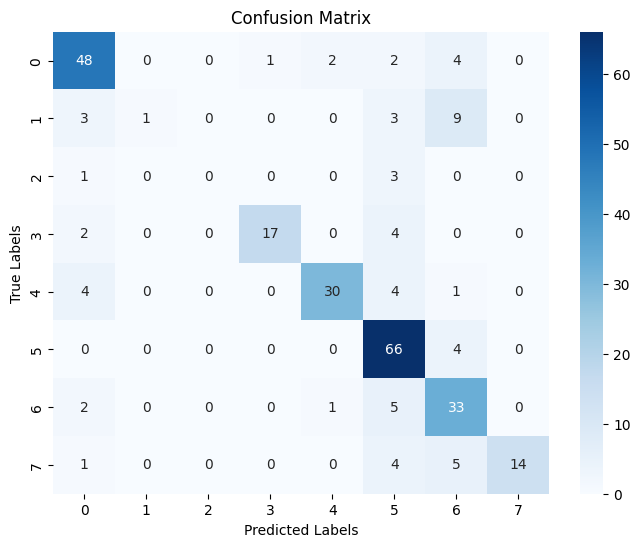

Model and vectorizer saved successfully!


In [1]:
import pandas as pd
import re
from sklearn.model_selection import train_test_split
from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import classification_report, confusion_matrix, accuracy_score
from nltk.corpus import stopwords
from nltk.tokenize import word_tokenize
from nltk.stem import WordNetLemmatizer
import matplotlib.pyplot as plt
import seaborn as sns
import nltk

# Download necessary NLTK resources
nltk.download('punkt')
nltk.download('stopwords')
nltk.download('wordnet')

# Load dataset
train_data = pd.read_csv('train.csv', encoding='latin1')

# Text cleaning function
def clean_text(text):
    text = re.sub(r'http\S+|www\S+|https\S+', '', text, flags=re.MULTILINE)  # Remove URLs
    text = re.sub(r'@\w+|#', '', text)  # Remove mentions and hashtags
    text = re.sub(r'[^A-Za-z\s]', '', text)  # Remove special characters and numbers
    text = text.lower()  # Convert to lowercase
    return text

train_data['CleanedText'] = train_data['SentimentText'].apply(clean_text)

# Tokenization, stopword removal, and lemmatization
stop_words = set(stopwords.words('english'))
lemmatizer = WordNetLemmatizer()

def preprocess_text(text):
    tokens = word_tokenize(text)
    tokens = [lemmatizer.lemmatize(word) for word in tokens if word not in stop_words]
    return ' '.join(tokens)

train_data['ProcessedText'] = train_data['CleanedText'].apply(preprocess_text)

# Feature extraction using TF-IDF
vectorizer = TfidfVectorizer(max_features=5000, ngram_range=(1, 2))
X = vectorizer.fit_transform(train_data['ProcessedText'])
y = train_data['Sentiment']

# Split data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Train a Logistic Regression model
model = LogisticRegression()
model.fit(X_train, y_train)

# Predict and evaluate the model
y_pred = model.predict(X_test)

print("Classification Report:\n", classification_report(y_test, y_pred))
print("Confusion Matrix:\n", confusion_matrix(y_test, y_pred))
print("Accuracy Score:", accuracy_score(y_test, y_pred))

# Plot the confusion matrix
plt.figure(figsize=(8, 6))
sns.heatmap(confusion_matrix(y_test, y_pred), annot=True, fmt='d', cmap='Blues', xticklabels=model.classes_, yticklabels=model.classes_)
plt.title('Confusion Matrix')
plt.xlabel('Predicted Labels')
plt.ylabel('True Labels')
plt.show()

# Save the model and vectorizer
import joblib
joblib.dump(model, 'sentiment_model.pkl')
joblib.dump(vectorizer, 'tfidf_vectorizer.pkl')

print("Model and vectorizer saved successfully!")
